<a href="https://colab.research.google.com/github/AbinathAAA/Data-Frame-and-SQL--week-01/blob/main/Data_Frame_and_SQL_week_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, mean, when, isnull

# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
spark = SparkSession.builder \
                    .appName("Tutorial_DF") \
                    .master("local[*]") \
                    .config("spark.executor.memory", "4g") \
                    .config("spark.driver.memory", "2g") \
                    .config("spark.executor.cores", "2") \
                    .config("spark.sql.inMemoryColumnarStorage.compressed", "true") \
                    .getOrCreate()

In [ ]:
spark

In [ ]:
# Load CSV into DataFrame
file_path = "/content/drive/MyDrive/AUel_work/PlayerDataset.csv"
df = spark.read.csv(file_path, header=True, inferSchema=True)

# Show the first 5 rows
print("Showing first 5 rows:")
df.show(5)

# Print schema of the DataFrame
print("Schema of DataFrame:")
df.printSchema(1)

Showing first 5 rows:
+---+-----------------+---+--------------------+-----------+--------------------+-------+---------+-------------------+--------------------+------------+----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
|_c0|             Name|Age|               Photo|Nationality|                Flag|Overall|Potential|               Club|           Club Logo|Player_Value|Wage|Special|Acceleration|Aggression|Agility|Balance|Ball control|Composure|Crossing|Curve|Dribbling|Finishing|Free_kick

In [ ]:
#find number of partition
num_partitions = df.rdd.getNumPartitions()
print(f"Number of partitions: {num_partitions}")

Number of partitions: 10


In [ ]:
#Reparition
df = df.repartition(10)
num_partitions = df.rdd.getNumPartitions()
print(f"Number of partitions: {num_partitions}")

Number of partitions: 10


In [ ]:
# Find total number of columns and rows
print("Total number of columns and rows:")
num_columns = len(df.columns)
num_rows = df.count()
print(f"Number of columns: {num_columns}, Number of rows: {num_rows}")

Total number of columns and rows:
Number of columns: 75, Number of rows: 17981


In [ ]:
df.describe().show()

+-------+-----------------+-------------+------------------+--------------------+-----------+--------------------+-----------------+------------------+--------------------+--------------------+-----------------+-----+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+-----------------+------------------+------------------+-----------------+-----------------+-----------------+-------------

In [ ]:
df.summary().show()


+-------+-----------------+-------------+------------------+--------------------+-----------+--------------------+-----------------+------------------+--------------------+--------------------+-----------------+-----+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+-----------------+------------------+------------------+-----------------+-----------------+-----------------+-------------

In [ ]:
# Check for null values in each column
print("Checking for columns with null values:")
null_counts = df.select([(count(when(isnull(c), c)).alias(c))\
                         for c in df.columns])
null_counts.show()

Checking for columns with null values:
+---+-----------+----------+-----+-------+----+-------+---------+----+---------+------------+----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+---+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
|_c0|Player_Name|Player_Age|Photo|Country|Flag|Overall|Potential|Club|Club Logo|Player_Value|Wage|Special|Acceleration|Aggression|Agility|Balance|Ball control|Composure|Crossing|Curve|Dribbling|Finishing|Free_kick accuracy|GK_diving|GK_handling|GK_kicking|GK_positioning|GK_reflexes|Heading accuracy|Interceptions|Jumpi

In [ ]:
# Rename columns (example renaming)
print("Renaming columns:")
new_column_names = {"Name": "Player_Name", "Age": "Player_Age", "Nationality": "Country"}
for old_name, new_name in new_column_names.items():
    df = df.withColumnRenamed(old_name, new_name)

# Show updated column names
print("Updated DataFrame with renamed columns:")
df.show(5)

Renaming columns:
Updated DataFrame with renamed columns:
+-----+-----------+----------+--------------------+-------------+--------------------+-------+---------+--------------------+--------------------+------------+----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
|  _c0|Player_Name|Player_Age|               Photo|      Country|                Flag|Overall|Potential|                Club|           Club Logo|Player_Value|Wage|Special|Acceleration|Aggression|Agility|Balance|Ball control|Compos

In [ ]:
# Select specific columns
print("Selecting columns Player_Name and Player_Age:")
df.select("Player_Name", "Player_Age").show(5)

# Show distinct nationalities
print("Distinct countries:")
df.select("Country").distinct().show()

Selecting columns Player_Name and Player_Age:
+------------+----------+
| Player_Name|Player_Age|
+------------+----------+
|L. Escalante|        25|
| M. Pintilii|        32|
|Luis Alberto|        24|
| M. Carrusca|        33|
|F. Al Johani|        25|
+------------+----------+
only showing top 5 rows

Distinct countries:
+-----------------+
|          Country|
+-----------------+
|         Paraguay|
|           Russia|
|          Senegal|
|           Sweden|
|           Guyana|
|           Turkey|
|             Iraq|
|   St Kitts Nevis|
|          Germany|
|          Comoros|
|      Ivory Coast|
|           France|
|           Greece|
|           Kosovo|
|         DR Congo|
|          Algeria|
|Equatorial Guinea|
|         Slovakia|
|        Argentina|
|            Wales|
+-----------------+
only showing top 20 rows



In [ ]:
# Filtering rows where Overall > 90
print("Filtering players with Overall > 90:")
df.filter(col("Overall") > 90).select("Player_Name", "Overall")\
.show()

# Filtering rows where Player_Age < 25
print("Filtering players younger than 25:")
df.filter(col("Player_Age") < 25)\
.select("Player_Name", "Player_Age").show()

Filtering players with Overall > 90:
+-----------------+-------+
|      Player_Name|Overall|
+-----------------+-------+
|   R. Lewandowski|     91|
|        L. Suárez|     92|
|Cristiano Ronaldo|     94|
|           Neymar|     92|
|         L. Messi|     93|
|         M. Neuer|     92|
+-----------------+-------+

Filtering players younger than 25:
+-------------------+----------+
|        Player_Name|Player_Age|
+-------------------+----------+
|      V. Klonaridis|        24|
|     F. Monteseirín|        22|
|          K. Harris|        24|
|         S. Adekoya|        21|
|A. De Oliveira Maia|        19|
|           E. Şahin|        22|
|         J. Tabidze|        21|
|           M. Mount|        18|
|           M. Sanoh|        21|
|           C. Brown|        23|
|       C. Stanković|        24|
|        S. Lundholm|        23|
|         C. Ogilvie|        21|
|           Costinha|        24|
|        M. Roerslev|        18|
|         I. Leschuk|        21|
|         A. Argýris

In [ ]:
# Group by Country and count players
print("Grouping by Country and counting players:")
df.groupBy("Country").count().show(5)

Grouping by Country and counting players:
+--------+-----+
| Country|count|
+--------+-----+
|Paraguay|   69|
|  Russia|  306|
| Senegal|  129|
|  Sweden|  368|
|  Guyana|    5|
+--------+-----+
only showing top 5 rows



In [ ]:
# Group by Club and calculate average player overall rating
print("Group by Club and calculate average Overall:")
df_filled.groupBy("Club")\
.agg(mean("Overall").alias("Average Overall"))\
.show(5)

# Average player rating by country
print("Average player rating by country:")
average_rating_by_country = df_filled.groupBy("Country")\
.agg(mean("Overall").alias("Average Rating"))\
.orderBy(col("Average Rating").desc())

Group by Club and calculate average Overall:
+------------------+-----------------+
|              Club|  Average Overall|
+------------------+-----------------+
|           Palermo|66.17857142857143|
|       Yeovil Town|59.76190476190476|
|1. FC Union Berlin|68.11111111111111|
|        Sagan Tosu|            63.44|
|             Carpi|64.03333333333333|
+------------------+-----------------+
only showing top 5 rows

Average player rating by country:


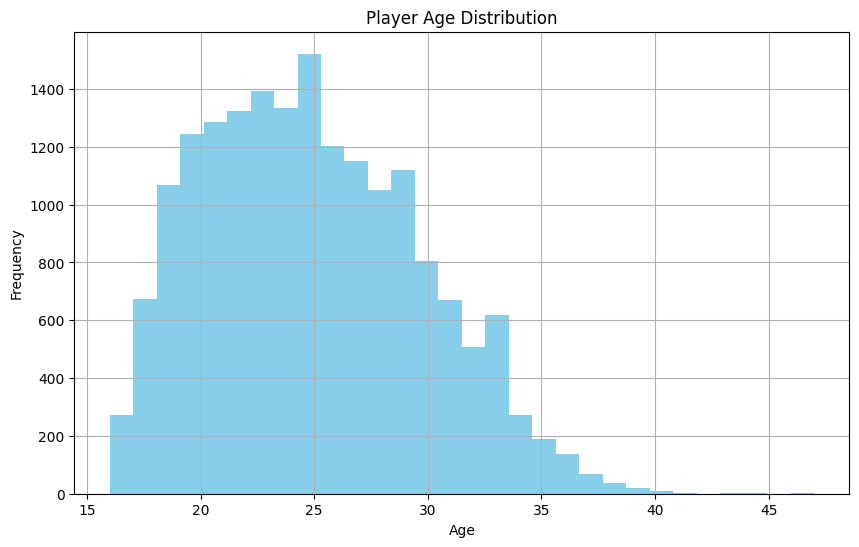

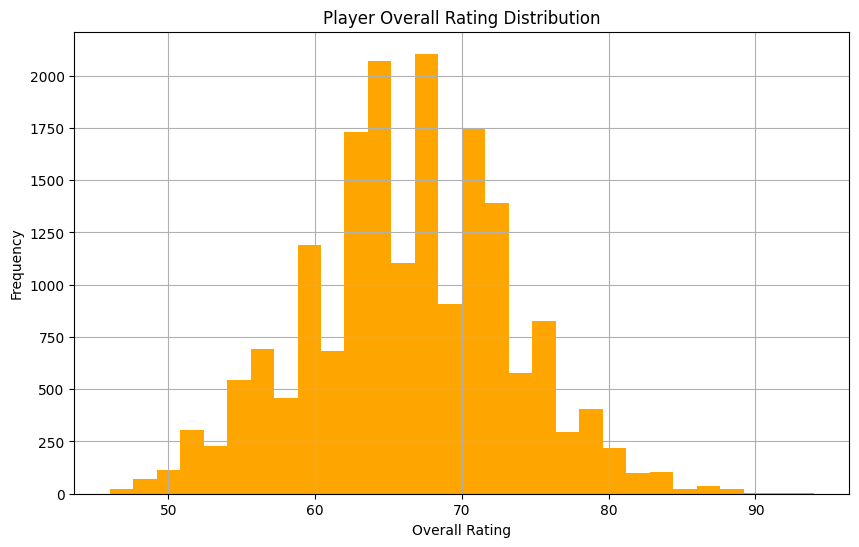

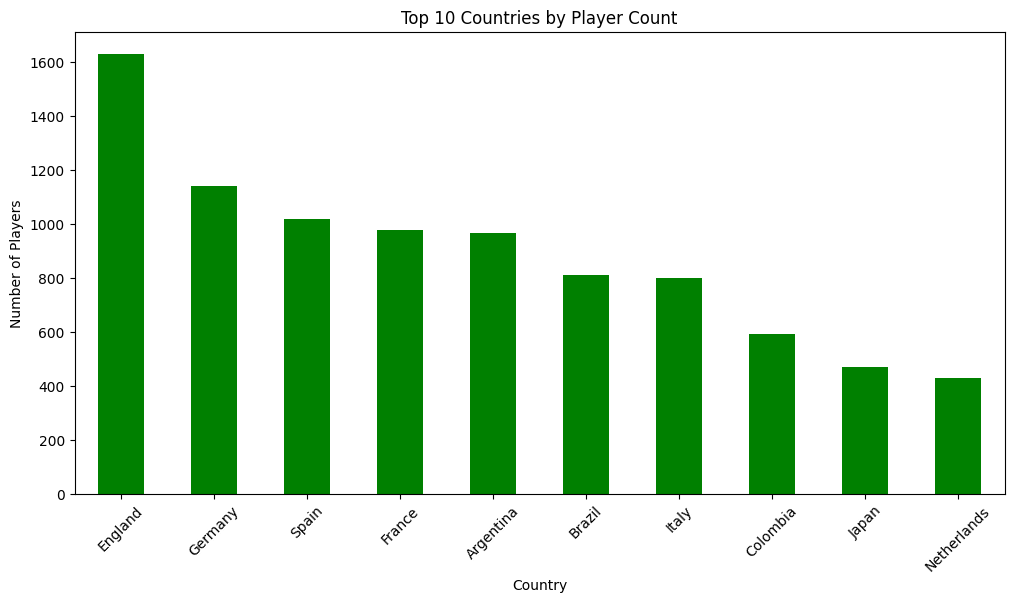

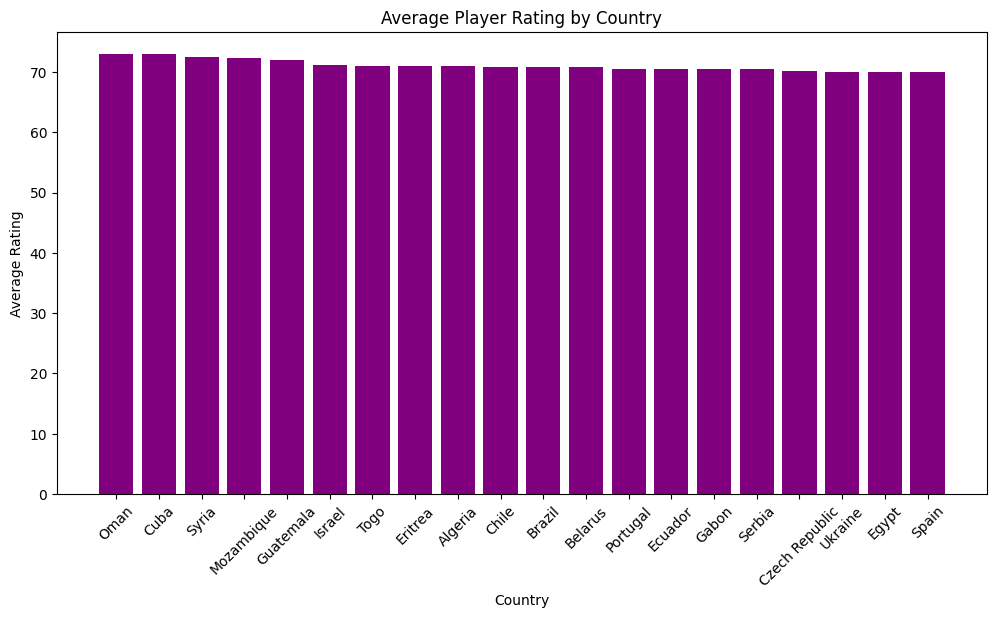

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
# Visualization: Convert Spark DataFrame to Pandas DataFrame for plotting
pandas_df = df_filled.select("Player_Age", "Overall", "Country").toPandas()

# Plot Age Distribution
plt.figure(figsize=(10, 6))
pandas_df["Player_Age"].hist(bins=30, color='skyblue')
plt.title("Player Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Plot Overall Rating Distribution
plt.figure(figsize=(10, 6))
pandas_df["Overall"].hist(bins=30, color='orange')
plt.title("Player Overall Rating Distribution")
plt.xlabel("Overall Rating")
plt.ylabel("Frequency")
plt.show()

# Bar Plot of Top 10 Countries by Player Count
country_counts = pandas_df["Country"].value_counts().head(10)
plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar', color='green')
plt.title("Top 10 Countries by Player Count")
plt.xlabel("Country")
plt.ylabel("Number of Players")
plt.xticks(rotation=45)
plt.show()


# Bar Plot of top10 Average Player Rating by Country
average_rating_pd_df = average_rating_by_country.toPandas()
average_rating_pd_df=average_rating_pd_df.head(20)
plt.figure(figsize=(12, 6))
plt.bar(average_rating_pd_df["Country"],
        average_rating_pd_df["Average Rating"], color='purple')
plt.title("Average Player Rating by Country")
plt.xlabel("Country")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.createOrReplaceTempView("players")

In [ ]:
# Q6: Club performance overview (for bubble chart)
q6 = spark.sql("""
    SELECT Club,
           COUNT(*) AS PlayerCount,
           ROUND(AVG(Overall), 1) AS AvgOverall,
           ROUND(sum(player_Value), 2) AS TotalValueM
    FROM players
    WHERE Club IS NOT NULL AND player_Value IS NOT NULL
    GROUP BY Club
    HAVING PlayerCount > 10
    ORDER BY TotalValueM DESC
""").toPandas()

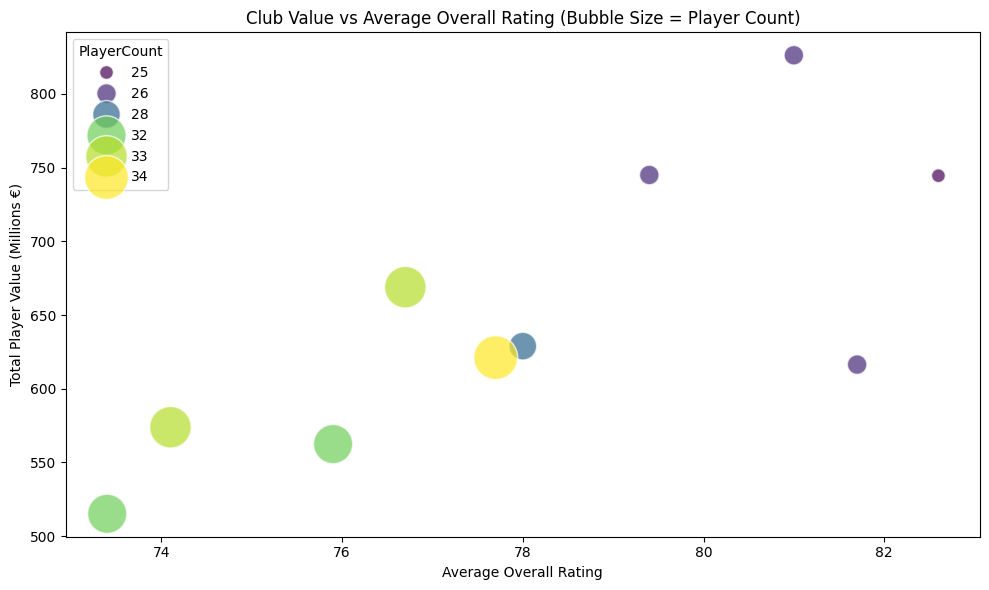

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=q6.head(10),
    x="AvgOverall",
    y="TotalValueM",
    size="PlayerCount",
    hue="PlayerCount",
    palette="viridis",
    legend=True,

    sizes=(100, 1000),
    alpha=0.7
)
plt.title("Club Value vs Average Overall Rating (Bubble Size = Player Count)")
plt.xlabel("Average Overall Rating")
plt.ylabel("Total Player Value (Millions €)")
plt.tight_layout()
plt.show()

In [ ]:
# Q7: Position groups distribution
q7 = spark.sql("""
    SELECT
        CASE
            WHEN `Preferred_Positions` LIKE '%GK%' THEN 'Goalkeeper'
            WHEN `Preferred_Positions` RLIKE 'CB|RB|LB|RWB|LWB' THEN 'Defender'
            WHEN `Preferred_Positions` RLIKE 'CM|CDM|CAM|RM|LM' THEN 'Midfielder'
            WHEN `Preferred_Positions` RLIKE 'ST|CF|LW|RW' THEN 'Forward'
            ELSE 'Other'
        END AS PositionGroup,
        COUNT(*) AS NumPlayers
    FROM players
    GROUP BY PositionGroup
""").toPandas()

/tmp/ipython-input-3390137345.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=q7, x="PositionGroup", y="NumPlayers", palette="muted")


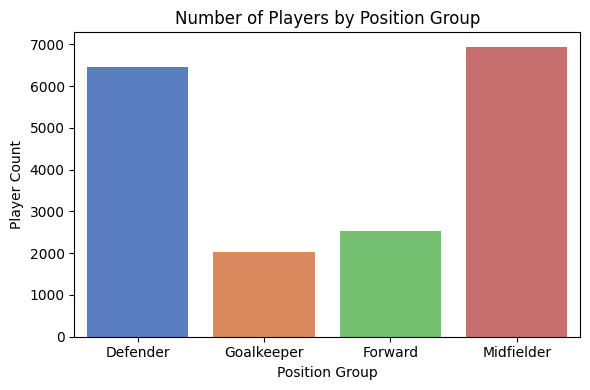

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(data=q7, x="PositionGroup", y="NumPlayers", palette="muted")
plt.title("Number of Players by Position Group")
plt.xlabel("Position Group")
plt.ylabel("Player Count")
plt.tight_layout()
plt.show()

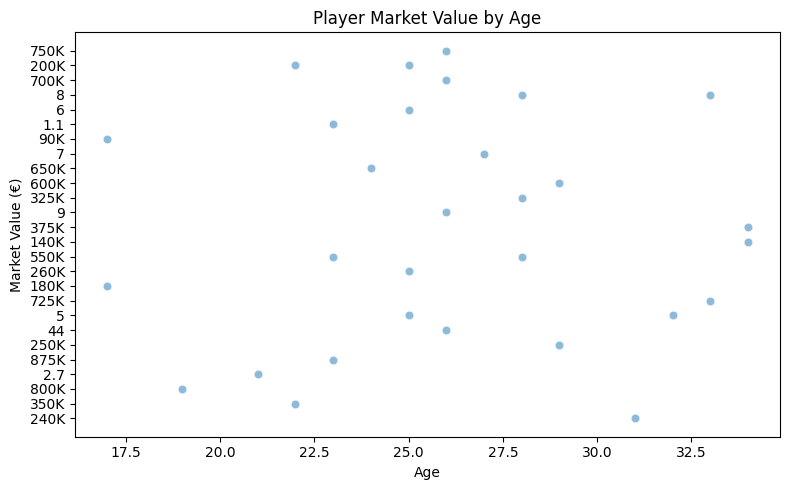

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=q8.head(30), x="Player_Age", y="player_Value", alpha=0.5)
plt.title("Player Market Value by Age")
plt.xlabel("Age")
plt.ylabel("Market Value (€)")
plt.tight_layout()
plt.show()

In [ ]:
q8.head(15)

,Player_Age,player_Value
0,26,750K
1,22,200K
2,26,700K
3,28,8
4,25,6
5,23,1.1
6,17,90K
7,27,7
8,24,650K
9,29,600K


from matplotlib import pyplot as plt
_df_0['Player_Age'].plot(kind='hist', bins=20, title='Player_Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Player_Age'].plot(kind='line', figsize=(8, 4), title='Player_Age')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
spark.stop()